## Picture_1:

- ChatGPT response: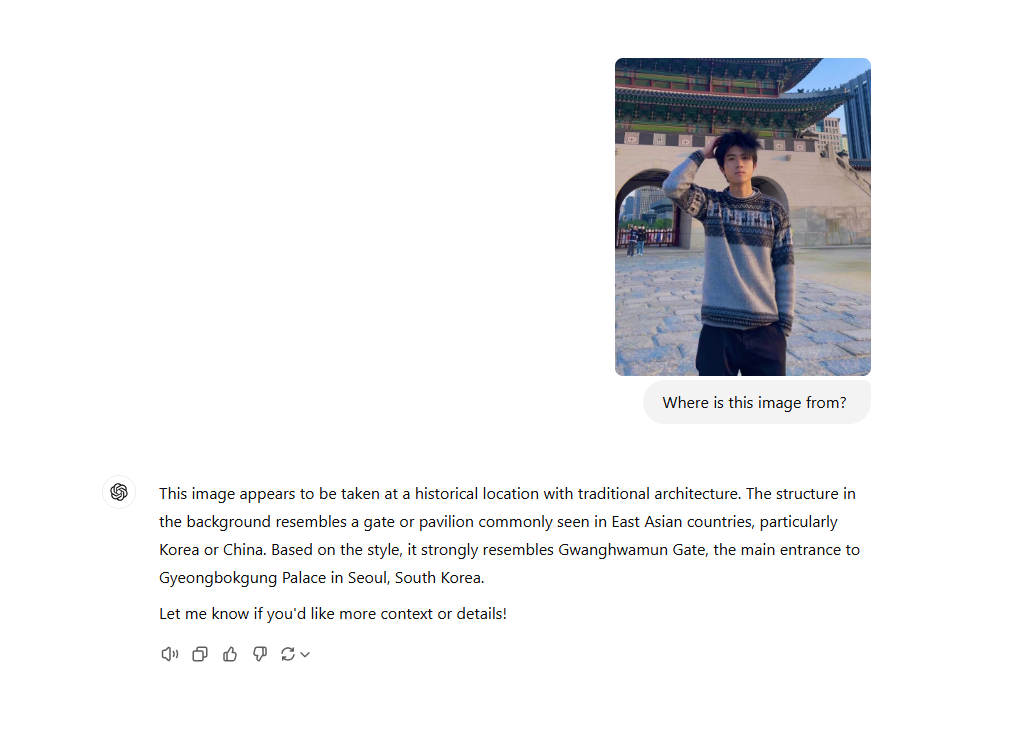

- The 'width' of the king's path is 7m according to this [link](https://www.vmspace.com/eng/news/news_view.html?base_seq=MjgwNA==).

Using another image to make the point find the width of the gate.

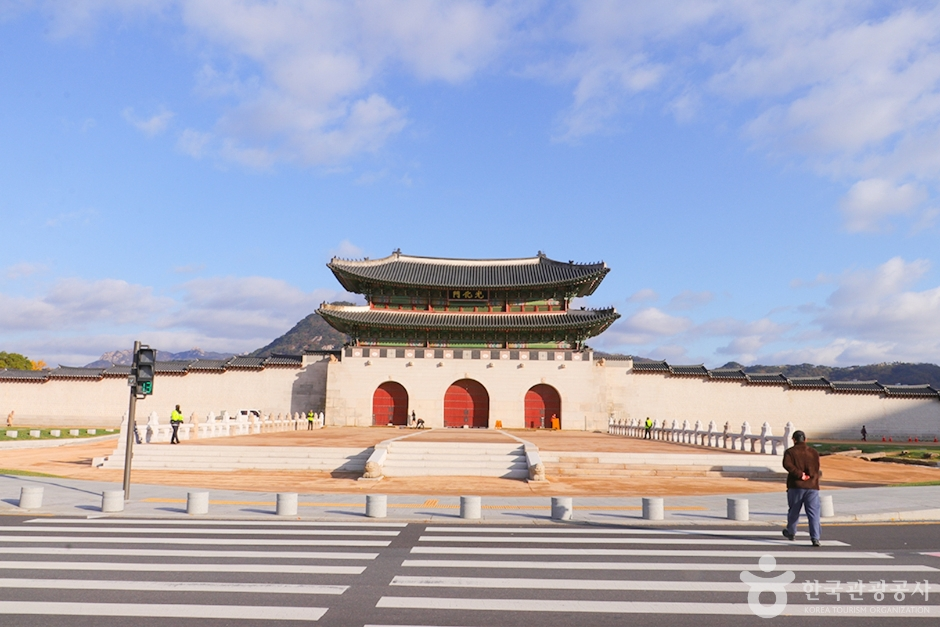

- The width of the gate == king's path (the middle line.)

In [ ]:
import cv2
import glob

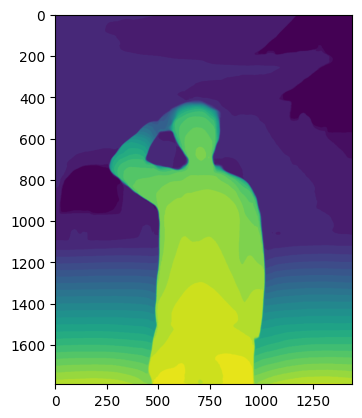

In [ ]:
import matplotlib.pyplot as plt

photo_depth = cv2.imread("/content/photo_2_depth.jpg", cv2.COLOR_BGR2RGB)
plt.imshow(photo_depth)

In [ ]:
photo_depth[800][250], photo_depth[800][750]

(0, 21)

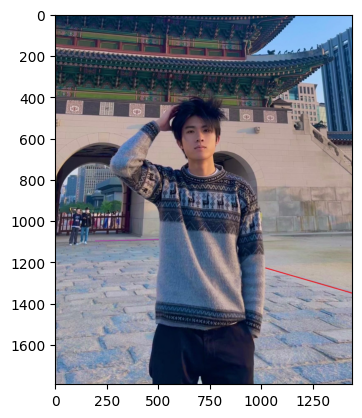

In [ ]:
from PIL import Image

photo_lined = Image.open("/content/photo_2_lined.jpg")
plt.imshow(photo_lined)

In [ ]:
## photo_lined

## find edges in the image.

In [ ]:
image_path = './photo_2_lined.jpg'

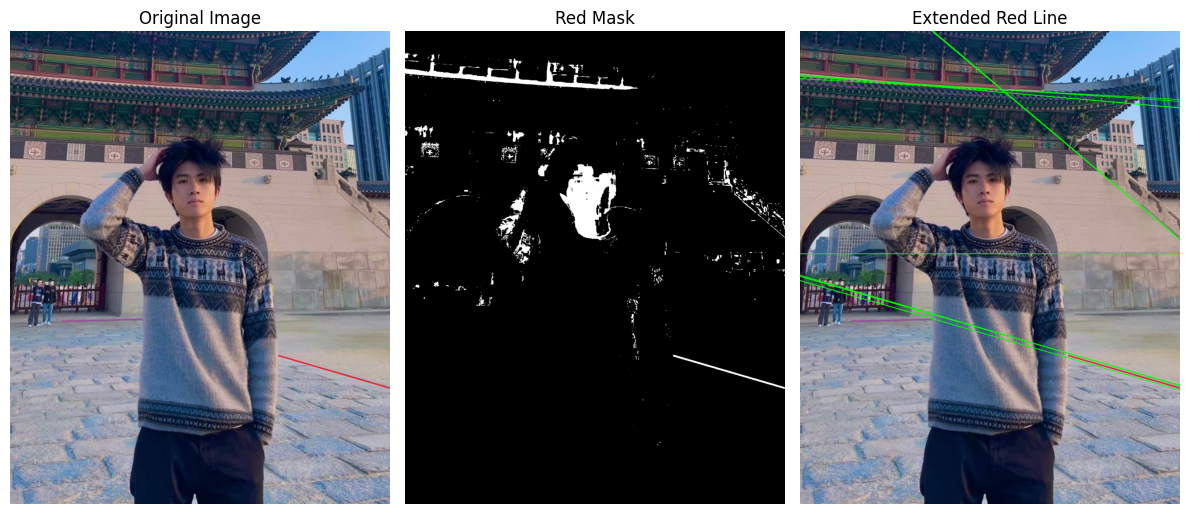

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('./photo_2_lined.jpg')
if image is None:
    print("Error: Image not found!")
    exit()

# Convert the image to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define red color range in HSV
lower_red1 = np.array([0, 50, 50])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 50, 50])
upper_red2 = np.array([180, 255, 255])

# Create masks for red ranges
mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
red_mask = cv2.bitwise_or(mask1, mask2)

# Apply morphological operations to emphasize thick lines
kernel = np.ones((5, 5), np.uint8)
dilated_mask = cv2.dilate(red_mask, kernel, iterations=2)

# Convert the mask to grayscale and detect edges
gray_mask = dilated_mask
edges = cv2.Canny(gray_mask, 50, 150)

# Detect lines using Hough Transform
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=100, minLineLength=100, maxLineGap=20)

# Draw and extend the detected lines on the original image
output = image.copy()
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]

        # Calculate the slope and intercept
        if x2 != x1:  # Avoid division by zero
            slope = (y2 - y1) / (x2 - x1)
            intercept = y1 - slope * x1

            # Extend the line to the image boundaries
            height, width = image.shape[:2]
            extended_x1 = 0  # Start at the left edge
            extended_y1 = int(intercept)  # y = slope * x + intercept

            extended_x2 = width  # End at the right edge
            extended_y2 = int(slope * width + intercept)

            # Draw the extended line
            cv2.line(output, (extended_x1, extended_y1), (extended_x2, extended_y2), (0, 255, 0), 2)
        else:
            # For vertical lines, extend to the top and bottom edges
            extended_y1 = 0
            extended_y2 = image.shape[0]
            cv2.line(output, (x1, extended_y1), (x2, extended_y2), (0, 255, 0), 2)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Red Mask')
plt.imshow(red_mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Extended Red Line')
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Save the new image
cv2.imwrite('photo_2_intersects.jpg', output)


True

## Based on extrapolation, this is the extraploted-intersection image.

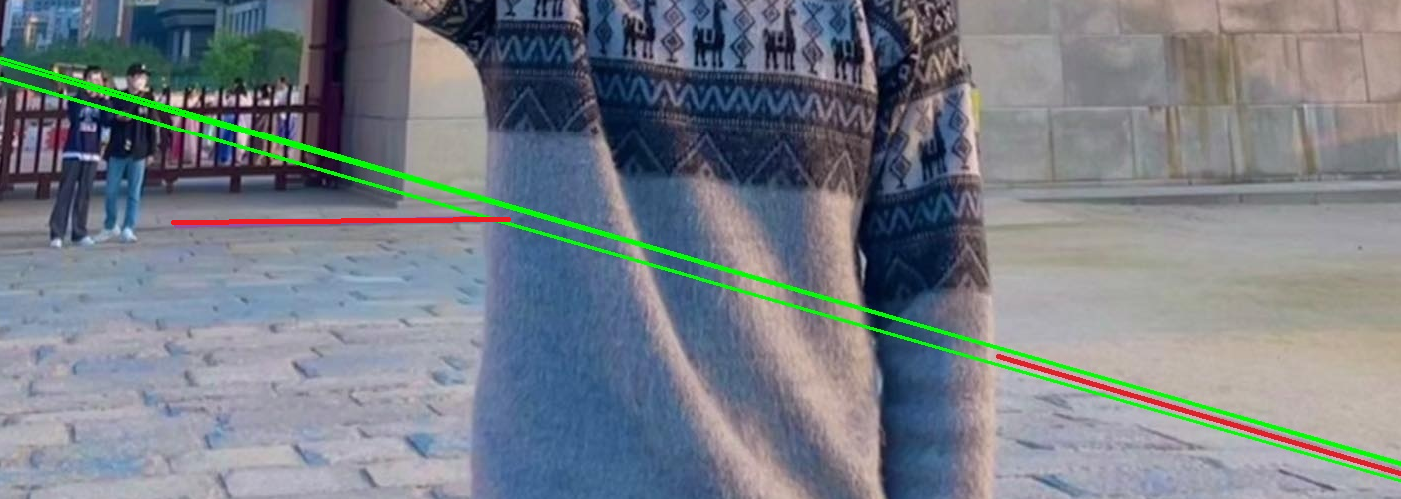

## Getting the correct red-line which is a projection of the king's path (which is 3.5m)

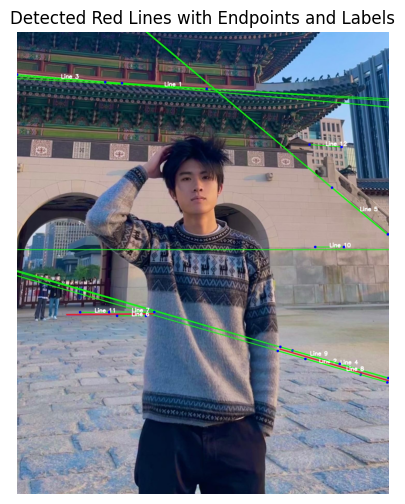

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_and_label_red_lines(image_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Image not found!")
        return None

    # Convert the image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define red color range in HSV
    lower_red1 = np.array([0, 50, 50])
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([170, 50, 50])
    upper_red2 = np.array([180, 255, 255])

    # Create masks for red ranges
    mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
    mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
    red_mask = cv2.bitwise_or(mask1, mask2)

    # Apply morphological operations to emphasize thick lines
    kernel = np.ones((5, 5), np.uint8)
    dilated_mask = cv2.dilate(red_mask, kernel, iterations=2)

    # Convert the mask to grayscale and detect edges
    gray_mask = dilated_mask
    edges = cv2.Canny(gray_mask, 50, 150)

    # Detect lines using Hough Transform
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=100, minLineLength=100, maxLineGap=20)

    # Draw the detected red lines and label the endpoints
    output = image.copy()
    line_number = 1
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            # Draw the red lines in green color
            cv2.line(output, (x1, y1), (x2, y2), (0, 255, 0), 2)

            # Draw the endpoints in blue
            cv2.circle(output, (x1, y1), 5, (255, 0, 0), -1)  # Start point
            cv2.circle(output, (x2, y2), 5, (255, 0, 0), -1)  # End point

            # Label the lines with their number
            label_position = (x1 + x2) // 2, (y1 + y2) // 2
            cv2.putText(output, f'Line {line_number}', label_position, cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            line_number += 1

    return output, lines

# Example usage
output_image, lines = detect_and_label_red_lines('./photo_2_intersect_red.jpg')

# Display the results
if output_image is not None:
    plt.figure(figsize=(6, 6))
    plt.title('Detected Red Lines with Endpoints and Labels')
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Save the image with labels
    cv2.imwrite('detected_red_lines_with_labels.jpg', output_image)


In [ ]:
lines[10]

array([[ 244, 1086,  356, 1086]], dtype=int32)

## plot lines[10] - (x1, y1, x2, y2) on image.

In [ ]:
lines[10]

array([[ 244, 1086,  356, 1086]], dtype=int32)

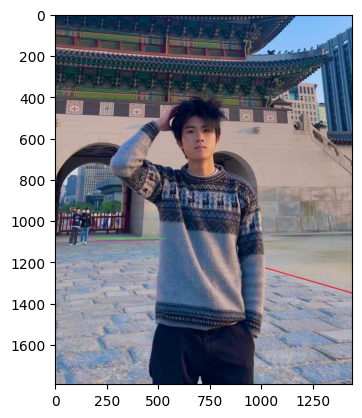

In [ ]:
# x1, y1, x2, y2 = lines[6][0]
x1, y1, x2, y2 = lines[6][0]
x1 = 200
image_copy = cv2.imread('./photo_2_lined.jpg')
# image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2HSV)
cv2.line(image_copy, (x1, y1), (x2, y2), (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))

## this matches, so okay: 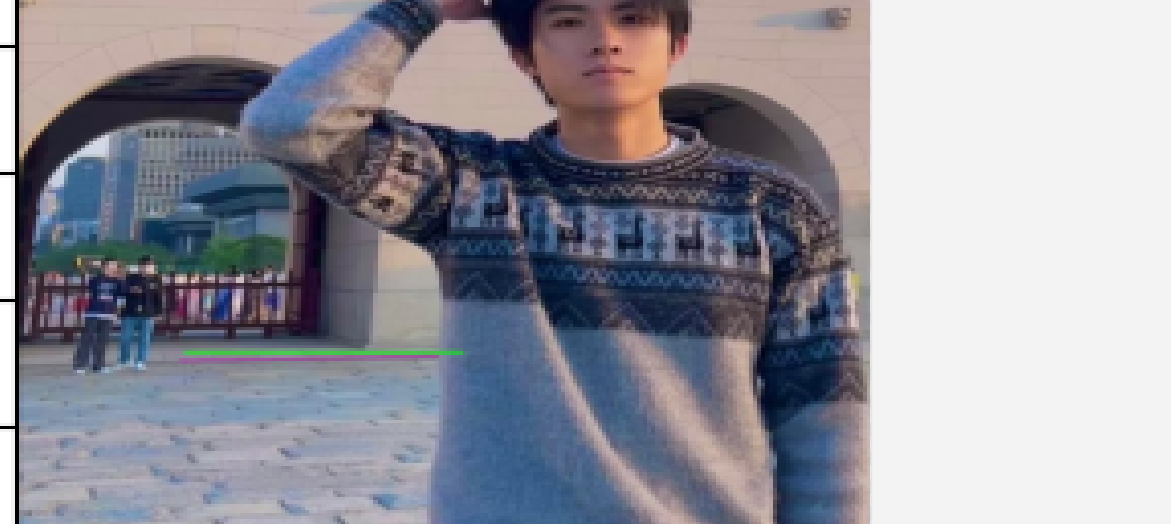

In [ ]:
x1, y1, x2, y2

(200, 1085, 531, 1085)

## Cannot be 3.5 m (the projection of the half-gate), So we need a bit of trigonometry.

<img src="https://github.com/abhishek9909/Height_Find_Pipeline/blob/main/process_2.jpg?raw=true" height="500" ></img>

The line number 8 (with index 7) should give idea about slope:
<img src="https://github.com/abhishek9909/Height_Find_Pipeline/blob/main/detected_red_lines_with_labels.jpg?raw=true" height="500"></img>

In [ ]:
lines[7][0]

array([1116, 1267, 1433, 1358], dtype=int32)

In [ ]:
## the slope is a2 - a1 / b2 - b1.
a1, b1, a2, b2 = lines[7][0]
slope = (a2 - a1) / (b2 - b1)
slope

3.4835164835164836

In [ ]:
import math
theta = math.degrees(math.atan(slope))
theta

73.98301424106414

In [ ]:
## get 3.5 x cos(theta)
a_dis = 3.5 * math.cos(math.radians(theta))
a_dis

0.9657281090172878

## Now a little bit of unit-arithmetic:
---




<img src="https://github.com/abhishek9909/Height_Find_Pipeline/blob/main/process_1.jpg?raw=true&u=8" height="500" width="500" class="rotate-image" ></img>

Gist:
- Depth is relative.

For example,
- a meters at a depth-ratio of 2 occupies 100 pixels.
- x meters at a depth-ratio of 20 occupies 200 pixels.

then 20*x / 200 == 2*a/10 so, x = 2*a*200 / 20 * 100 => x = a/5

In [ ]:
d1 = photo_depth[y1][x1]
d2 = photo_depth[y2][x2] ## since the shirt is there, this is blocked.

In [ ]:
d1, d2

(2, 22)

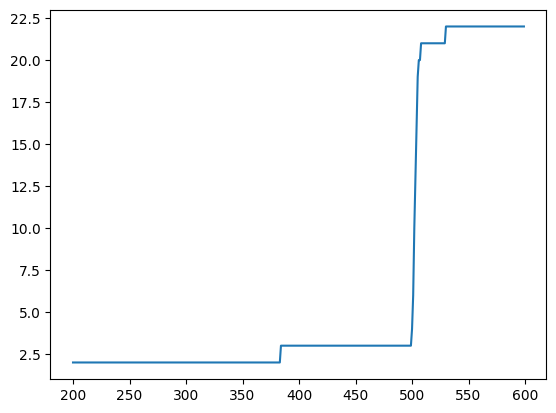

In [ ]:
depth_bar = []
for y in range(200, 600):
  depth_bar.append(photo_depth[1085][y])

ys = range(200, 600)
plt.plot(ys, depth_bar)

## This means:
- Person is at a depth ratio of 22
- Gate-entrace is at a depth ratio of 3

## Lets remember the landmark photos we have:

<table>
        <tr>
            <td><img src="https://github.com/abhishek9909/Height_Find_Pipeline/blob/main/landmarks/photo_0.jpg?raw=true&u=s&l=1" alt="Photo 0"></td>
            <td><img src="https://github.com/abhishek9909/Height_Find_Pipeline/blob/main/landmarks/photo_1.jpg?raw=true&u=s&p=1" alt="Photo 1"></td>
            <td><img src="https://github.com/abhishek9909/Height_Find_Pipeline/blob/main/landmarks/photo_2.jpg?raw=true&u=s&p=1" alt="Photo 2"></td>
        </tr>
        <tr>
            <td><img src="https://github.com/abhishek9909/Height_Find_Pipeline/blob/main/landmarks/photo_3.jpg?raw=true&y=s&p=2" alt="Photo 3"></td>
            <td><img src="https://github.com/abhishek9909/Height_Find_Pipeline/blob/main/landmarks/photo_4.jpg?raw=true&z=s&p=2" alt="Photo 4"></td>
            <td></td> <!-- Empty cell to make the grid 2x3 -->
        </tr>
    </table>

## We will use [this](https://www.kaggle.com/datasets/mexwell/body-measurements) as our prediction dataset in the next notebook, so we need these columns.
- ShoulderWidth (shoulder to shoulder joint)
- ChestWidth (the chest)
- Waist (the waist)
- ArmLength (shoulder to wrist)

See some chaotic math here:

<img src="https://github.com/abhishek9909/Height_Find_Pipeline/blob/main/process_3.jpg?raw=true&u=0" height="500"></img>

Hypothesis values.

| Measurement      | Value (cm)
|------------------|------------|
| Shoulder Width   | 43 cm      |
| Chest Width      | 31 cm      |
| Waist            | 25 cm      |

Since we dont have accurate waist width (circumference)

See this chatGPT log:

<code>
Is waist elliptical or circular?
ChatGPT said:
ChatGPT
The waist is elliptical in shape, not circular. This is because the human torso is not perfectly round but rather elongated along the side-to-side axis, making it resemble an ellipse when viewed from above or below. Here's why:

Reasons the Waist is Elliptical:
Anatomical Structure:

The ribcage and hips shape the body, resulting in a wider horizontal dimension than the front-to-back dimension at the waist.
Muscle and Fat Distribution:

Muscles, organs, and fat are not distributed symmetrically in a circular manner; they follow the body's natural contours, leading to an elliptical shape.
Measurements:

When measuring the waist, tape measure circumference accounts for this irregularity, but the actual cross-sectional area is typically elliptical.
Would you like help with calculating the dimensions or understanding more about body shapes?






You said:
If waist width is 9 inches, how much do you think the waist circumference would be?
ChatGPT said:
ChatGPT
To estimate the waist circumference from the waist width (9 inches), we assume the waist is roughly elliptical in shape. The circumference of an ellipse is approximated using the formula:

𝐶
≈
𝜋
×
2
×
(
𝑎
2
+
𝑏
2
)
C≈π×
2×(a
2
 +b
2
 )
​

Where:

𝑎
a = semi-major axis (half the width of the waist)
𝑏
b = semi-minor axis (half the depth of the waist, which is usually smaller than the width).
Steps:
Given waist width (major axis): 9 inches (
2
𝑎
=
9
→
𝑎
=
4.5
2a=9→a=4.5).
Assume depth (minor axis): Let's estimate the depth as about 7 inches (
2
𝑏
=
7
→
𝑏
=
3.5
2b=7→b=3.5), which is common for most body proportions.
Plugging into the formula:
𝐶
≈
𝜋
×
2
×
(
4.
5
2
+
3.
5
2
)
C≈π×
2×(4.5
2
 +3.5
2
 )
​

𝐶
≈
𝜋
×
2
×
(
20.25
+
12.25
)
=
𝜋
×
2
×
32.5
C≈π×
2×(20.25+12.25)
​
 =π×
2×32.5
​

𝐶
≈
𝜋
×
65
≈
𝜋
×
8.06
≈
25.33

inches
.
C≈π×
65
​
 ≈π×8.06≈25.33inches.
Approximate Waist Circumference:
The waist circumference would be approximately 25.3 inches.

Let me know if you'd like further refinements or other assumptions!
</code>

## Not that confident :( about pose estimation labels. So I manually labelled the body parts and found their respective distances.

## Now, I want :
- Biacromial Diameter.
- Biiliac Diameter.
- Chest Diameter.

And we will infer the height based on these.

To corroborate, we also have an estimate (minus length of knee to toe)

Manually drawn stuff:

<img src="https://github.com/abhishek9909/Height_Find_Pipeline/blob/main/manual/photo_0.jpg?raw=true" height="200"></img>
<img src="https://github.com/abhishek9909/Height_Find_Pipeline/blob/main/manual/photo_1.jpg?raw=true" height="200"></img>
<img src="https://github.com/abhishek9909/Height_Find_Pipeline/blob/main/manual/photo_2.jpg?raw=true" height="200"></img>


In [ ]:
def get_np_squared_root_distance(x1, y1, x2, y2):
  return np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

In [42]:
get_np_squared_root_distance(421, 1040, 375, 1322)

285.72714256787015

In [ ]:
get_np_squared_root_distance(821, 1256, 1273, 1389)

471.1613311807326

In [43]:
get_np_squared_root_distance(821, 1256, 1273, 1389)

471.1613311807326

In [44]:
get_np_squared_root_distance(473, 904, 715, 892)

242.2973379961076

In [45]:
get_np_squared_root_distance(239, 826, 454, 899)

227.05505940189926

In [46]:
get_np_squared_root_distance(799, 975, 759, 1137)

166.86521506892922

## I encountered a 6th photo, NOW we dont need the dataset anymore,


photo:
<img src="https://github.com/abhishek9909/Height_Find_Pipeline/blob/main/manual/photo_5.jpg?raw=true" height="500"></img>

After some more rough calculations:

<img src="https://github.com/abhishek9909/Height_Find_Pipeline/blob/main/final_process.jpg?raw=true" height="1000"></img>

These are the rough estimates of Body parts and Height:

- Shoulder Width: 40.1 cm.
- Chest Width: 30 cm
- Pelvic Width: 30.7 cm
- Head to Waist: 82 cm
- Arm Length: 41 cm
- Waist to Knee: 55 cm
- Knee to Ankle: 59 cm

Total Height: 82 + 55 + 59 == 195 cm